In [1]:
import numpy as np
import matplotlib.pyplot as plt

Problem 1:   
a) What is 30 [dB] in real number scale?  
b) What is 6 [dB] in real number scale? 

In [2]:
# ANSWER
problem_a = 10**(0.1*30)
problem_b = 10**(0.1*6)

print(problem_a)
print(problem_b)

# a = 1000
# b = 4

1000.0
3.981071705534973


## QPSK modulation 

Data : binary data. For example, [0 1 1 0 0 1 0 ...]  
QPSK modulation:   
$00 \rightarrow S_1: \left(\sqrt{\mathcal{E}/2},\sqrt{\mathcal{E}/2}\right)$,   
$01 \rightarrow S_2: \left(\sqrt{\mathcal{E}/2},-\sqrt{\mathcal{E}/2}\right)$,   
$11 \rightarrow S_3: \left(-\sqrt{\mathcal{E}/2},-\sqrt{\mathcal{E}/2}\right)$,   
$10 \rightarrow S_4: \left(-\sqrt{\mathcal{E}/2},\sqrt{\mathcal{E}/2}\right)$. 


$x$ : QPSK modulated signal. For example, $[S_2, S_4, S_2, \cdots]$  
$y = x + n$ : received signal  
$n = \left(n_1, n_2 \right)$ : AWGN noise, $n_1, n_2 \sim \mathcal{N}(0,\sigma^2/2)$

Ex) What is the variance of $n$?


In [3]:
N_symbols = 20
E = 1
sigma = 1

data = np.random.randint(0, 2, N_symbols)
print('binary data:',data)

S_1 = np.array([np.sqrt(E/2)+np.sqrt(E/2)*1j])
S_2 = np.array([np.sqrt(E/2)-np.sqrt(E/2)*1j])
S_3 = np.array([-np.sqrt(E/2)-np.sqrt(E/2)*1j])
S_4 = np.array([-np.sqrt(E/2)+np.sqrt(E/2)*1j])


binary data: [0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1]


In [4]:
X = np.array([])

for n in range(0,N_symbols,2):
    qpsk = np.sqrt(E/2)*(-(data[n]*2-1))+np.sqrt(E/2)*(-(data[n+1]*2-1))*1j
    X = np.append(X, qpsk)

print('QPSK signal:',X)
#노이즈 발생
Y = X + np.random.normal(0,sigma,len(X)) + np.random.normal(0,sigma,len(X))*1j

#노이즈 제거
#Y = X
print('received signal:',Y)

QPSK signal: [ 0.70710678+0.70710678j -0.70710678-0.70710678j  0.70710678-0.70710678j
  0.70710678-0.70710678j -0.70710678+0.70710678j -0.70710678-0.70710678j
 -0.70710678-0.70710678j -0.70710678-0.70710678j  0.70710678-0.70710678j
 -0.70710678-0.70710678j]
received signal: [ 1.30182788+0.98442754j -2.39366742-1.86499778j  0.1493696 -0.47232768j
 -0.38347649-1.38228522j -3.02634687+0.11420201j -0.07628338-0.39524059j
  0.18686897+0.64490423j  0.55685413-0.69706813j  1.1112183 -0.21602299j
 -1.05337597-1.60024915j]


ML Detection

In [5]:
S_to_Y = np.zeros(4)
Y_trans_bit = np.array([])

s1 = np.ravel(np.array([S_1.real, S_1.imag]), order='C')
s2 = np.ravel(np.array([S_2.real, S_2.imag]), order='C')
s3 = np.ravel(np.array([S_3.real, S_3.imag]), order='C')
s4 = np.ravel(np.array([S_4.real, S_4.imag]), order='C')


for n in range(len(Y)):
    Y_complex_to_point = np.array([Y[n].real, Y[n].imag])
    
    #S_1과의 거리
    S_to_Y[0]= np.linalg.norm(s1 - Y_complex_to_point)
    #S_2과의 거리
    S_to_Y[1]= np.linalg.norm(s2 - Y_complex_to_point)
    #S_3과의 거리
    S_to_Y[2]= np.linalg.norm(s3 - Y_complex_to_point)
    #S_4과의 거리
    S_to_Y[3]= np.linalg.norm(s4 - Y_complex_to_point)
    
    min = np.argmin(S_to_Y)
    if min == 0:
        Y_trans_bit = np.append(Y_trans_bit, np.array([0, 0]))
    elif min == 1:
        Y_trans_bit = np.append(Y_trans_bit, np.array([0, 1]))
    elif min == 2:
        Y_trans_bit = np.append(Y_trans_bit, np.array([1, 1]))
    elif min == 3:
        Y_trans_bit = np.append(Y_trans_bit, np.array([1, 0]))

print(Y_trans_bit)

X_detected = (Y_trans_bit > 0)
print(X_detected)

print('number of erros:', np.sum(data != X_detected))
print('error probability:',np.sum(data != X_detected)/data.shape)

[0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.]
[False False  True  True False  True  True  True  True False  True  True
 False False False  True False  True  True  True]
number of erros: 4
error probability: [0.2]


LOOP for different SNR values

In [6]:
SNR_dB = np.arange(0,11,1)
SNR_real = 10**(0.1*SNR_dB)
sigma = 1
E_array = SNR_real*sigma**2

print(SNR_dB)
print(SNR_real)
print(E_array)

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 1.          1.25892541  1.58489319  1.99526231  2.51188643  3.16227766
  3.98107171  5.01187234  6.30957344  7.94328235 10.        ]
[ 1.          1.25892541  1.58489319  1.99526231  2.51188643  3.16227766
  3.98107171  5.01187234  6.30957344  7.94328235 10.        ]


In [7]:
#N_symbols = 1000000
N_symbols = 1000000
P_e = np.zeros(SNR_dB.shape) # [0,0,0,0,0,0,0,0,0,0,0]

s1 = np.ravel(np.array([S_1.real, S_1.imag]), order='C')
s2 = np.ravel(np.array([S_2.real, S_2.imag]), order='C')
s3 = np.ravel(np.array([S_3.real, S_3.imag]), order='C')
s4 = np.ravel(np.array([S_4.real, S_4.imag]), order='C')

for n in range(len(E_array)):
    E = E_array[n]
    
    data = np.random.randint(0, 2, N_symbols)

    X = np.array([])

    for i in range(0,N_symbols,2):
        qpsk = np.sqrt(E/2)*(-(data[i]*2-1))+np.sqrt(E/2)*(-(data[i+1]*2-1))*1j
        X = np.append(X, qpsk)

    Y = X + np.random.normal(0,sigma,len(X)) + np.random.normal(0,sigma,len(X))*1j

    S_to_Y = np.zeros(4)
    Y_trans_bit = np.array([])

    for j in range(len(Y)):
        Y_complex_to_point = np.array([Y[j].real, Y[j].imag])
    
        #S_1과의 거리
        S_to_Y[0]= np.linalg.norm(s1 - Y_complex_to_point)
        #S_2과의 거리
        S_to_Y[1]= np.linalg.norm(s2 - Y_complex_to_point)
        #S_3과의 거리
        S_to_Y[2]= np.linalg.norm(s3 - Y_complex_to_point)
        #S_4과의 거리
        S_to_Y[3]= np.linalg.norm(s4 - Y_complex_to_point)
    
        min = np.argmin(S_to_Y)
        if min == 0:
            Y_trans_bit = np.append(Y_trans_bit, np.array([0, 0]))
        elif min == 1:
            Y_trans_bit = np.append(Y_trans_bit, np.array([0, 1]))
        elif min == 2:
            Y_trans_bit = np.append(Y_trans_bit, np.array([1, 1]))
        elif min == 3:
            Y_trans_bit = np.append(Y_trans_bit, np.array([1, 0]))

    P_e[n] = np.sum(data != (Y_trans_bit > 0))/data.shape

print(P_e)





[0.239597 0.213935 0.186443 0.159506 0.131343 0.104366 0.07934  0.056945
 0.037668 0.02281  0.012818]


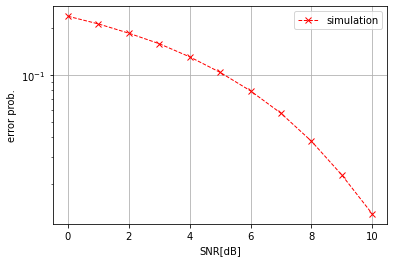

In [8]:
plt.semilogy(SNR_dB,P_e,linewidth=1, linestyle='--',color='r',marker='x',label='simulation')
plt.grid()
plt.legend()
plt.xlabel('SNR[dB]')
plt.ylabel('error prob.')
plt.show()


Your project: What is the error probability of QPSK for different SNR values? 